# Titanic DataSet EDA

### https://www.kaggle.com/c/titanic
This is the legendery DataSet as it is the first dataset I analysed and cleaned with some basic EDA (Exploratory Data Analysis) to Clean the DataSet for furthur use. 

In [13]:
# importing all the Required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('Libraries imported successfully!')

Libraries imported successfully!


In [14]:
# import the data and asigned to train
train = pd.read_csv('train.csv')

In [15]:
# Printing first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaing

##### Performing EDA and Data Cleaing using heatmap and basic Plotting.

In [16]:
# Checking is there any null values to be filled.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



As we can see from above stats, Age and Cabin Column have missing data which needs to be fullfilled.

But we will visualize to get better understanding than numbers.

<AxesSubplot:>

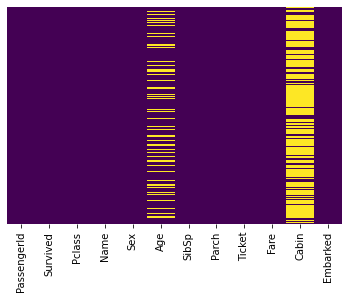

In [17]:
# ytciklabes have false as y is 890 that create mess and cbar is False Beacuse not required for this analysis.
# Cmap is changed to get data highlighted and Visulized Clearly
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Based on the above figure we can see that, Approx. 20% data of age is missing so its small proportion and we can compute it with some imputation. And in the cabin column major data is missing so w'll drop it as we can't fulfill the data based on the data provided.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

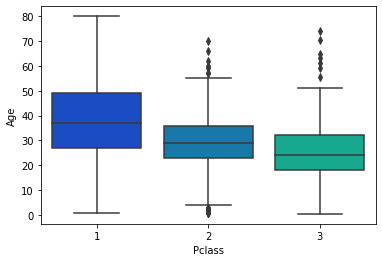

In [18]:
# Preparing for the Age to be filled using BoxPlot to get understanding about the Different Age Groups.
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter' )


We can see that in Class 1 Avgerage Age is 37 and in Class 2 Average Age is 29 and Class 3 Average Age is 24.

So we change according to the Class based on the Data which is missing by using User_defined Function.

In [20]:
# This function will select two columns Age and PClass and Check if PClass1 Data is missing then compute the Vaule 37, 29, 34 Respectively.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [21]:
# Now We will apply the function and asign the respective Value.
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

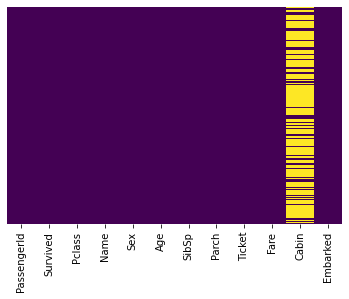

In [23]:
# Visualizing the Age column to be filled.
sns.heatmap(train.isnull(), cbar= False, yticklabels=False, cmap='viridis')

In [24]:
# Now we solved the age issue by replacing the null values but cabin values can't be solved as 
# data is major missing se we drop that column
# and checking the Data using head()
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

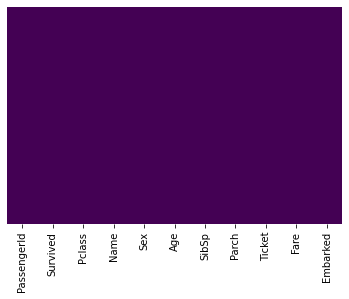

In [26]:
# Data Is now cleaned and ready for Furthur analysis.
sns.heatmap(train.isnull(), cbar= False, yticklabels=False, cmap='viridis')

In [27]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Performing EDA and Plotting some graphs for Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

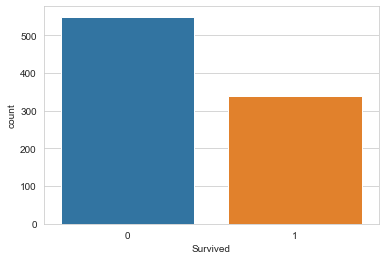

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train) # 0 is not survived and 1 is survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

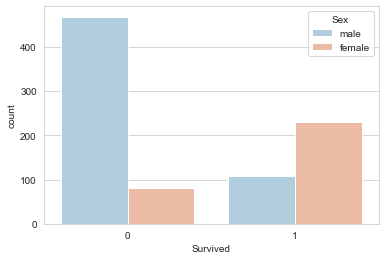

In [29]:
sns.countplot(x='Survived', hue='Sex', data = train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

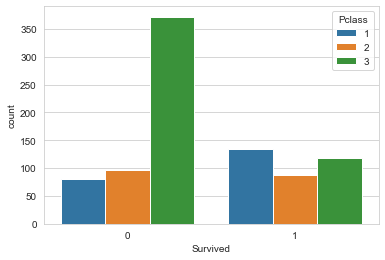

In [30]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

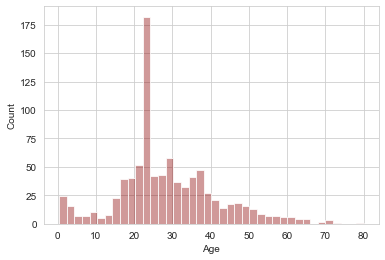

In [31]:
sns.histplot(train['Age'].dropna(), color='darkred', bins=40, alpha= 0.4)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

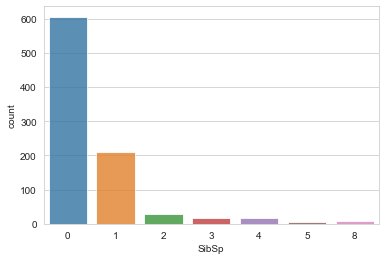

In [32]:
sns.countplot(x='SibSp', data=train, alpha=.8)

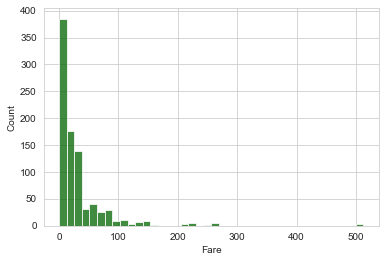

In [33]:
# fair price
sns.histplot(train['Fare'], color='darkgreen', bins=40)
plt.show()